**IMPORTING THE ESSENTIAL LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



**LOADING THE DATASET**

In [ ]:
sj=pd.read_csv('/content/penguins.csv')
sj.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


**REMOVING NULL VALUES(NAN VALUES)**

In [ ]:
sj=sj.dropna()
sj.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


**ENCODING THE CATEGORICAL VARIABLES**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sj['gender'] = le.fit_transform(sj['sex'])
sj.drop('sex', axis=1, inplace=True)


In [ ]:
sj.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,2


**STANDARDIZATION OF THE DATASET**

In [ ]:
sj_scaled = sj.copy()
cols_to_scale = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
sj_scaled[cols_to_scale] = scaler.fit_transform(sj[cols_to_scale])
sj_scaled = pd.DataFrame(sj_scaled)
sj_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,-0.897723,0.777263,-0.126893,-0.572233,2
1,-0.824265,0.117037,-0.107872,-0.509923,1
2,-0.677349,0.421757,-0.073633,-1.195338,1
4,-1.338472,1.081983,-0.081242,-0.946096,1
5,-0.860994,1.742210,-0.092655,-0.696854,2


In [ ]:
x=sj_scaled.drop("gender",axis=1)
y=sj_scaled["gender"]

**SPLITTING OF TRAINING AND TESTING DATA**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=36)

**REGRESSION MODEL FITTING**



In [ ]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()

In [ ]:
model_1.fit(x_train, y_train)


LinearRegression()

In [ ]:
model_2.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_3.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(x_test)
pred_3 = model_3.predict(x_test)

In [ ]:
pred_final = (pred_1+pred_2+pred_3)/3.0

In [ ]:
mse1=mean_squared_error(y_test, pred_3)
print(f"Mean squared error: {mse:.2f}")

Mean squared error: 0.06


In [ ]:
mse=mean_squared_error(y_test, pred_final)
print(f"Mean squared error: {mse:.2f}")


Mean squared error: 0.63


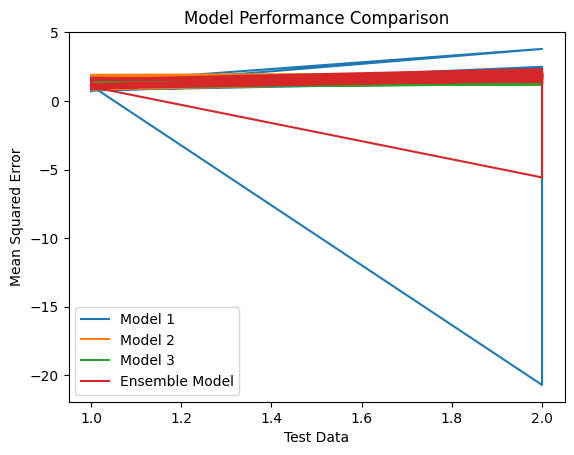

In [ ]:
plt.plot(y_test, pred_1, label='Model 1')
plt.plot(y_test, pred_2, label='Model 2')
plt.plot(y_test, pred_3, label='Model 3')
plt.plot(y_test, pred_final, label='Ensemble Model')
plt.xlabel('Test Data')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

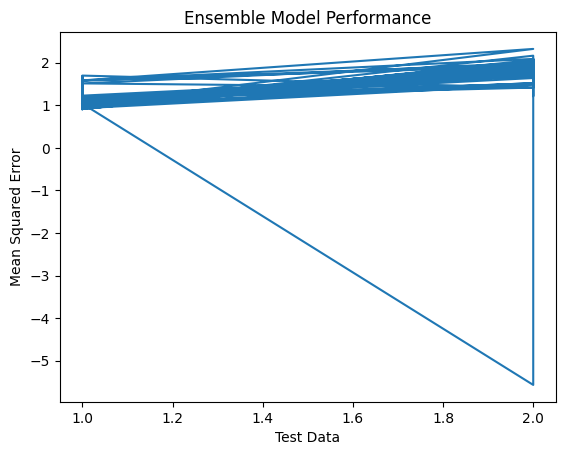

In [ ]:
plt.plot(y_test, pred_final)
plt.xlabel('Test Data')
plt.ylabel('Mean Squared Error')
plt.title('Ensemble Model Performance')
plt.show()

In [ ]:
model_4 = LogisticRegression()
model_5 = XGBClassifier()
model_6 = RandomForestClassifier()

In [ ]:
model_6.fit(x_train, y_train)
final_pred = model_6.predict(x_test)
print(log_loss(y_test, final_pred))

15.70218563486292


In [ ]:
final_model = VotingClassifier(estimators=[('lr', model_4), ('xgb', model_5), ('rf', model_6)],
voting='hard')
final_model.fit(x_train, y_train)
final_pred = final_model.predict(x_test)


In [ ]:
print(log_loss(y_test, pred_final))

12.784656951920256


In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
bagging= BaggingClassifier(base_estimator=tree, n_estimators=17, random_state=42)

In [ ]:
bagging.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=17,
                  random_state=42)

In [ ]:
y_pred = bagging.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Bagging Classifier: {accuracy * 100:.2f}%')

Accuracy of Bagging Classifier: 92.08%


In [ ]:
l=[]
for no_of_estimnators in range(25):
    bagging = BaggingClassifier(base_estimator=tree, n_estimators = no_of_estimnators+1, random_state=42)
    bagging.fit(x_train, y_train)
    y_pred = bagging.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    l.append(accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [ ]:
l

[0.8712871287128713,
 0.8217821782178217,
 0.900990099009901,
 0.8712871287128713,
 0.9108910891089109,
 0.900990099009901,
 0.8910891089108911,
 0.8910891089108911,
 0.9306930693069307,
 0.9207920792079208,
 0.9306930693069307,
 0.9207920792079208,
 0.9207920792079208,
 0.9306930693069307,
 0.9108910891089109,
 0.9108910891089109,
 0.9207920792079208,
 0.9306930693069307,
 0.9306930693069307,
 0.9306930693069307,
 0.9306930693069307,
 0.900990099009901,
 0.9207920792079208,
 0.8910891089108911,
 0.900990099009901]